In [1]:
import requests
import json
import re
from lxml import etree
import time
import csv
import pandas as pd
import random
import os

In [2]:
#选择30个用于爬虫的网站
webs = [
    "https://movie.douban.com/subject/25728006/comments?", 
    "https://movie.douban.com/subject/26260853/comments?", 
    "https://movie.douban.com/subject/4286017/comments?", 
    "https://movie.douban.com/subject/27163278/comments?",
    "https://movie.douban.com/subject/6537500/comments?", 
    "https://movie.douban.com/subject/1307442/comments?",
    "https://movie.douban.com/subject/2132930/comments?",
    "https://movie.douban.com/subject/35267208/comments?",
    "https://movie.douban.com/subject/1292052/comments?",
    "https://movie.douban.com/subject/1292722/comments?",
    "https://movie.douban.com/subject/26752088/comments?",
    "https://movie.douban.com/subject/1291561/comments?",
    "https://movie.douban.com/subject/1295644/comments?",
    "https://movie.douban.com/subject/25662329/comments?",
    "https://movie.douban.com/subject/1292720/comments?",
    "https://movie.douban.com/subject/1291546/comments?",
    "https://movie.douban.com/subject/34941536/comments?",
    "https://movie.douban.com/subject/1889243/comments?",
    "https://movie.douban.com/subject/20495023/comments?",
    "https://movie.douban.com/subject/26794435/comments?",
    "https://movie.douban.com/subject/27060077/comments?",
    "https://movie.douban.com/subject/1292064/comments?",
    "https://movie.douban.com/subject/3319755/comments?",
    "https://movie.douban.com/subject/3541415/comments?",
    "https://movie.douban.com/subject/26387939/comments?",
    "https://movie.douban.com/subject/3742360/comments?",
    "https://movie.douban.com/subject/3793023/comments?",
    "https://movie.douban.com/subject/26683290/comments?",
    "https://movie.douban.com/subject/1292001/comments?",
    "https://movie.douban.com/subject/7065154/comments?",
]

In [9]:
#清空csv文件
file_path = "pinglun.csv"

if os.path.isfile(file_path):
    with open(file_path, "w") as f:
        f.truncate()

In [12]:
#爬取用户对于电影的评论和星星数，并将数据存入csv文件
def crawler(url):
    for number in range(11):
        num = number * 20
        start = str(num)
        url = url
#         url = "https://movie.douban.com/subject/23761370/comments?"
#         url = "https://movie.douban.com/subject/1418200/comments?"
        param = {
            "percent_type": "",
            "start": start,
            "limit": "20",
            "status": "P",
            "sort": "new_score",
            "comments_only": "1"
        }
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.55'}

        try:
            res_text = requests.get(url=url, params=param, headers=headers).text
            res_html = json.loads(res_text)["html"]
            star = re.findall("allstar..", res_html)
            comments = etree.HTML(res_html).xpath("//span[contains(@class, 'short')]/text()")
        #因为经常评论看着看着就要扫码登录，而登录界面返回的就不是所要的json了，所以这里用到了try expect，避免爬一半报错
        except json.JSONDecodeError:
            print("JSONDecodeError: Skipping URL {}".format(number))
            continue
    
#         res_text = requests.get(url=url, params=param, headers=headers).text
#         res_html = json.loads(res_text)["html"]
#         star = re.findall("allstar..", res_html)
#         comments = etree.HTML(res_html).xpath("//span[contains(@class, 'short')]/text()")
    
        table = [0] * len(star)
        #因为爬下来的星级样式是allstar**,比如五颗星是allstar50，所以为了获得这个“5”，对字符串进行了切割
        for i in range(len(star)):
            star[i] = star[i][-2:-1]
            if int(star[i]) >= 4:
                table[i] = 1
            else:
                table[i] = 0
            
    
        if len(star)==len(comments):
            zipped = zip(star, comments, table)
            result = list(zipped)

#             if os.path.getsize("pinglun.csv"):
#                 df = pd.DataFrame(result)
#                 df.to_csv('pinglun.csv',mode='a', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
        
#             else:
#                 df = pd.DataFrame(result)
#                 df.to_csv('pinglun.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
            #这里尝试过很多种写入文档的方式，最终选择这个最简单确实最合理的
            df = pd.DataFrame(result)
            df.to_csv('.\comment.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
        
#             if number == 0:
#                 header = ('star','comment','table')
#                 df = pd.DataFrame(result)
#                 df.to_csv('.\pinglun.csv',mode='a', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
#                 df.to_csv('.\pinglun.csv',mode='w', header=header, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
#             else:
#                 df = pd.DataFrame(result)
#                 df.to_csv('.\pinglun.csv',mode='a', header=False, index=False, quoting=csv.QUOTE_ALL, encoding='utf_8_sig')
                
#         if number == 0:
#             with open(".\pinglun.csv", mode = "w",newline='')as file:
#                 writer = csv.writer(file)
#                 for row in result:
#                     writer.writerow(row)
#         else:
#             with open(".\pinglun.csv", mode = "a",newline='')as file:
#                 writer = csv.writer(file)
#                 for row in result:
#                     writer.writerow(row)
            
            print("done",number)
    
        t = random.randint(1, 6)   
        time.sleep(t)
    

In [13]:
#爬取数据
for web in webs:
    crawler(web)

done 1
done 2
done 3
done 4
done 5
done 7
done 8
done 1
done 3
done 5
done 7
done 8
done 9
done 0
done 1
done 3
done 4
done 5
done 6
done 9
done 10
done 0
done 1
done 2
done 4
done 5
done 0
done 1
done 4
done 5
done 6
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 8
done 9
done 1
done 2
done 3
done 4
done 5
done 7
done 8
done 10
done 0
done 1
done 2
done 3
done 4
done 5
done 7
done 8
done 9
done 10
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 8
done 10
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 8
done 9
done 10
done 1
done 3
done 4
done 6
done 7
done 8
done 9
done 0
done 3
done 4
done 6
done 7
done 8
done 9
done 10
done 0
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 0
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 10
done 2
done 3
done 5
done 6
done 7
done 8
done 9
done 10
done 0
done 1
done 4
done 8
done 9
done 10
done 0
done 1
done 4
done 6
done 7
done 8
done 10
done 0
done 5
done 6
done 7
done 8
done 9
done 0
done 1
done 3
done 7
do

In [24]:
# 去除中文停用词
def drop_stop_words(st_path, word_list):

    with open(st_path, 'r') as f:
        st = f.read()
        st_list = st.splitlines()

    for stop_word in st_list:
        word_list = [word for word in word_list if word != stop_word]
    return word_list

In [25]:
#除去非中文的特殊符号
def drop_non_chinese(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

In [26]:
#分词并统计词频
import jieba

file_path_1 = "pinglun.txt"
txt = open("pinglun.txt","r",encoding = "gbk").read()

words = drop_non_chinese(txt)
words = jieba.lcut(words)
words = drop_stop_words(r'stop_words.txt', words)
#这里的停用词表本来只是网络上下载的通用的，但是在下面一个步骤，也就是词频统计时发现，有一些评论中经常出现的词也可以被认为是停用词，
#比如“一定”之类的，所以把下方词频统计中输出的一些词，根据人工筛选后，加入了停用词表。
counts = {}
for word in words:
    if len(word) == 1:
        continue
    else:
        counts[word] = counts.get(word, 0) + 1
items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
            

In [27]:
for i in range(50):
    word, count = items[i]
    print("{0},{1}".format(word,count))

喜欢,350
世界,315
剧情,289
好看,224
中国,183
经典,172
爱情,167
观众,161
导演,161
希望,161
人生,161
系列,156
角色,153
生活,151
人物,134
现实,133
人类,132
宇宙,130
哪吒,126
不错,121
印度,116
感动,112
科幻,112
动作,111
永远,111
动画,106
每个,105
应该,104
看过,104
特别,103
激情,103
时间,102
结尾,101
情节,101
作品,100
音乐,100
自由,100
一次,99
一起,99
美国,98
煽情,98
主角,97
意义,96
画面,96
真正,96
一定,95
美好,95
成为,94
速度,94
无法,93


In [30]:
#这里画了词云图，不知道为什么在本地因为字体的问题一直报错，但是这段代码在华为云的modelarts上可以跑通，
#所以这段代码所生成的词云图是在华为云上生成并下载的。
import jieba
import wordcloud
f = open("pinglun.txt","r",encoding='gbk')
t = f.read()
f.close
ls = jieba.lcut(txt)
txt = " ".join(ls)


w = wordcloud.WordCloud(width = 1000, height = 800, background_color = "white",font_path = "msyh.ttc", max_words = 50)
w.generate(txt)
w.to_file("pinglun1.png")

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re
import jieba
import gensim
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix

In [58]:
#看看每一类样本有多少数据
df=pd.read_csv('pinglun.csv')
print('数量： %d' %df.shape[0])
pos = sum(df['lable']== 1)
neg = sum(df['lable']== 0)
positive_labels = [[0,1] for _ in range(pos)]
negative_labels = [[0,1] for _ in range(neg)]
print('正样本:',pos)
print('负样本:',neg)

数量： 4419
正样本: 3196
负样本: 1223


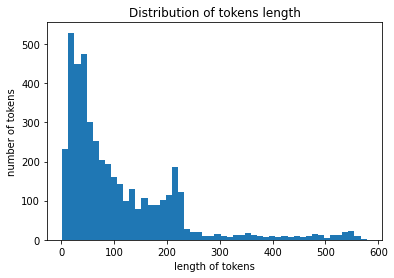

In [59]:
#看看每个token有多长，因为在补零后每个token最后的长度是相同的，所以这个长度也不能太长，不然补太多零了。
import matplotlib.pyplot as plt
num_tokens = [ len(str(tokens)) for tokens in df['comment'] ]

plt.hist(num_tokens, bins=50)
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

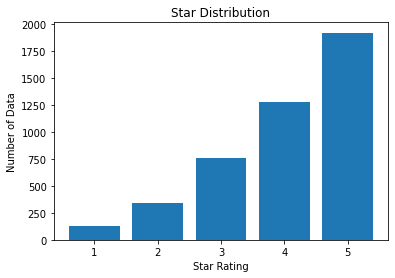

In [62]:
# 统计每个星级的数量
star_counts = df['star'].value_counts()

# 绘制柱状图
plt.bar(star_counts.index, star_counts.values)

# 添加标题和标签
plt.title('Star Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Data')

# 显示图形
plt.show()

In [37]:
# 中文分词
def split_text(chinese_text, cut_all=False):

    text_generater = jieba.cut(chinese_text, cut_all=cut_all)
    result = ' '.join(text_generater)
    return result

# 去除中文停用词
def drop_stop_words_1(st_path, chinese_text):

    with open(st_path, 'r') as f:
        sw = f.read()
        sw_list = sw.splitlines()
    word_list = chinese_text.split()

    for stop_word in sw_list:
        word_list = [word for word in word_list if word != stop_word]
    return word_list

#除去非中文的特殊符号
def drop_non_chinese(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')#这里去了个反，让不是中文的符号都被除去
    chinese_text = re.sub(pattern, '', text)
    return chinese_text

In [38]:
#确定X和Y对应数据集中的哪一列
X = data['comment']
Y = data['lable']

In [39]:
X = X.apply(lambda x: drop_non_chinese(str(x)))
X = X.apply(lambda x: split_text(x))
X = X.apply(lambda x: drop_stop_words_1(r'stop_words.txt', x))

In [40]:
def train_Word2Vec_model(text, save_path):
    model = gensim.models.Word2Vec(text, min_count=1, window=5)
    model.save(save_path)
    return model

def word_to_dict(X, word_vec_model):
    total_set = set()
    word_to_vec = dict()
    word_to_index = dict()

    for x in X:
        total_set = set.union(total_set, set(x))
    index = 1
    for i in total_set:
        word_to_vec[i] = word_vec_model[i]
        word_to_index[i] = index
        index += 1

    return word_to_vec, word_to_index

In [41]:
# 训练Word2Vec词向量模型与构建映射
word_vec_model = train_Word2Vec_model(X, r'word2vec.model')
word_to_vec, word_to_index = word_to_dict(X, word_vec_model.wv)

In [42]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=2)

In [43]:
def text_to_index(X, word_to_index, max_len=100):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))

    for i in range(m):
        j = 0
        for word in X[i][:max_len]:
            try:
                X_indices[i, j] = word_to_index[word]
                j += 1
            except KeyError:
                pass

    return X_indices

In [44]:
# word_to_index
# word_to_vec

In [46]:
# 构建Embedding层
def pretrained_embedding_layer(word_to_vec, word_to_index):
    
    vocab_len = len(word_to_index) + 1 
    emb_dim = word_to_vec['剧情'].shape[0]

    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec[word]

    weight = torch.from_numpy(emb_matrix)
    embedding = nn.Embedding.from_pretrained(weight)
    embedding.weight.requires_grad = True
#     print(emb_matrix.shape)

    return embedding

In [51]:
# 构建LSTM模型框架
class EmotionModel(nn.Module):
    def __init__(self, word_to_vec, word_to_index, max_len, hidden_dim):
        super(EmotionModel, self).__init__()
        self.embedding_dim = word_to_vec['剧情'].shape[0]
        self.hidden_dim = hidden_dim
        self.max_len = max_len

        #网络层次
        self.embedding = pretrained_embedding_layer(word_to_vec, word_to_index)
        self.lstm1 = nn.LSTM(input_size=self.embedding_dim, hidden_size=self.hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(0.5)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout2 = nn.Dropout(0.5)
        self.linear = nn.Linear(self.hidden_dim * self.max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        embeds = self.embedding((inputs.long()))
        lstm_out1, hidden = self.lstm1(embeds.view(-1, self.max_len, self.embedding_dim).float())
        drop_out1 = self.dropout1(lstm_out1)
        lstm_out2, hidden = self.lstm2(drop_out1.view(-1, self.max_len, self.hidden_dim).float())
        drop_out2 = self.dropout2(lstm_out2)
        fc_out1 = self.linear(drop_out2.contiguous().view(-1, self.max_len * self.hidden_dim))
        fc_out2 = self.sigmoid(fc_out1)
        return fc_out2

In [52]:
def data_loader(X_train, y_train, batch_size=None):
    train_db = TensorDataset(torch.from_numpy(X_train).float(), torch.squeeze(torch.from_numpy(y_train)))
    train_loader = DataLoader(train_db, batch_size=batch_size, shuffle=True)
    return train_loader


def train_model(X_train, y_train, X_test, y_test, word_to_vec, word_to_index, params_save_path,
                max_len=100, batch_size=100, lr=0.002, epochs=20, hidden_dim=50):

    X_train_indice = text_to_index(X_train, word_to_index, max_len=max_len)
    train_loader = data_loader(X_train_indice, y_train, batch_size=batch_size)
    model = EmotionModel(word_to_vec, word_to_index, max_len, hidden_dim)
    device = "cpu"
    model = model.to(device)
    lost = nn.BCELoss()
    
    # 指定优化器
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    m = len(X_train)
    num_batches = m / batch_size
    loss_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        for step, (batch_x, batch_y) in enumerate(train_loader):
            output = model.forward(batch_x)
            cost = lost(output.squeeze(), batch_y.float())

            epoch_loss += cost.detach()
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

        epoch_loss /= num_batches
        loss_list.append(epoch_loss)
        print('loss after epoch %i : %f' % (epoch, float(epoch_loss)))

    # 参数保存
    torch.save(model.state_dict(), params_save_path)


    # 绘制loss曲线
    plt.plot(loss_list)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()


    model = model.eval()
    # 训练集准确率
    output_train = model(torch.from_numpy(X_train_indice).float())
    pred_y_train = np.squeeze(np.round(output_train.data.numpy()).astype(int))
    print('Train Accuracy: %.2f%%' % float(np.sum(y_train == pred_y_train) / m * 100))

    # 测试集准确率
    X_test_indice = text_to_index(X_test, word_to_index, max_len=max_len)
    output_test = model(torch.from_numpy(X_test_indice).float())
    pred_y_test = np.squeeze(np.round(output_test.data.numpy()).astype(int))
    print('Test Accuracy: %.2f%%' % float(np.sum(y_test == pred_y_test) / len(X_test_indice) * 100))
    return pred_y_test

In [53]:
# 混淆矩阵
def confuse_matrix(y, pred_y):
    fp = np.sum((pred_y==1)&(y==0))
    fn = np.sum((pred_y==0)&(y==1))
    tp = np.sum((pred_y==1)&(y==1))
    tn = np.sum((pred_y==0)&(y==0))
    confuse_matrix = np.array([[tp, fp], [fn, tn]])
    precision = tp / (fp+tp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision*recall) / (precision+recall)
    print(confuse_matrix)
    print('Precision = %.2f,   Recall = %.2f    F1 = %.2f' % (precision, recall, F1))

loss after epoch 0 : 0.697044
loss after epoch 1 : 0.684104
loss after epoch 2 : 0.660662
loss after epoch 3 : 0.636707
loss after epoch 4 : 0.453616
loss after epoch 5 : 0.203288
loss after epoch 6 : 0.121154
loss after epoch 7 : 0.057353
loss after epoch 8 : 0.035560
loss after epoch 9 : 0.025979
loss after epoch 10 : 0.019740
loss after epoch 11 : 0.017739
loss after epoch 12 : 0.015983
loss after epoch 13 : 0.015784
loss after epoch 14 : 0.022198
loss after epoch 15 : 0.012832
loss after epoch 16 : 0.018147
loss after epoch 17 : 0.015118
loss after epoch 18 : 0.015912
loss after epoch 19 : 0.021704


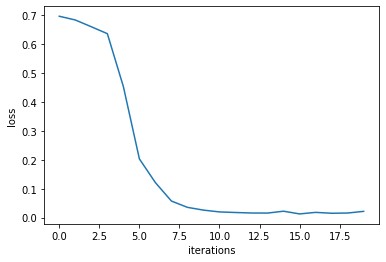

Train Accuracy: 99.43%
Test Accuracy: 73.76%
[[529 122]
 [110 123]]
Precision = 0.81,   Recall = 0.83    F1 = 0.82


In [54]:
# 训练模型
max_len = 50
batch_size = 500
hidden_dim = 100
params_save_path = r'emo_parms.pkl'
pred_y_test = train_model(X_train, y_train, X_test, y_test, word_to_vec, word_to_index, params_save_path,
                    max_len=max_len, batch_size=batch_size, hidden_dim=hidden_dim, lr=0.002, epochs=20) 
confuse_matrix(y_test, pred_y_test)

In [55]:
model = EmotionModel(word_to_vec, word_to_index, max_len, hidden_dim)
model.load_state_dict(torch.load(params_save_path))
model.eval()

EmotionModel(
  (embedding): Embedding(20170, 100)
  (lstm1): LSTM(100, 100, batch_first=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (lstm2): LSTM(100, 100, batch_first=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=5000, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [56]:
#预测模块，预测一段评论是正向的还是负向的
def predict(str):
    sentence = str
    sentence = drop_stop_words_1(r'stop_words.txt',split_text(drop_non_chinese(sentence)))
#     print(sentence)
    pre_sen = []
    pre_sen.append(sentence)
    pre_sen = np.array(pre_sen)
#     print(pre_sen)
    test_review_indice = text_to_index(pre_sen, word_to_index, max_len=max_len)
    output = model(torch.from_numpy(test_review_indice).float())
#     print(output)
    pred = np.squeeze(np.round(output.data.numpy()).astype(int))
#     print(pred)
    print("----------------------")
    print('评论内容：', str)
    print('预测评分：', ('4星以下' if output.item() <= 0.5 else '4星及以上'))
    print('预测情感：', ('正向' if pred == 1 else '负向'))

In [57]:
sentence1 = '虽然有巨石，实在太扯漏洞多得像筛子'
sentence2 = 'AWOSOME！看得我肾上腺激素爆发啊！！！'
sentence3 = 'FAST系列最喜欢的一季'
sentence4 = '今年最佳动作电影诞生'
sentence5 = '不爱鸡肉男不爱香车，到处找剧情bug，这电影看得累啊。'
sentence6 = '不出意外，这就是我的年度华语最佳了，无懈可击那种。'
sentence7 = '主题浮于表面…表达做作且矫情…警察局的戏份是把观众当傻逼吗…为什么要大早上来看一部青春伤痛文学式的狗血电影啊…四字dd演的倒还行'
predict(sentence1)

----------------------
评论内容： 虽然有巨石，实在太扯漏洞多得像筛子
预测评分： 4星以下
预测情感： 负向
